In [2]:
import numpy as np
import matplotlib.pyplot as plt 

/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
import math 
from scipy.fftpack import *

def hilbert_transform(signal):
    '''
    N : fft length
    M : number of elements to zero out
    U : DFT of signal
    V: IDFT of H(U) 
    '''

    N = len(signal)
    #take the forward Fourier transform
    U = fft(signal)
    M = N - N//2 - 1
    #Zero out negative frequency components
    U[N//2+1:] = [0] * M 
    #double fft energy except #DC0
    U[1:N//2] = 2 * U[1:N//2]
    #take inverse of Fourier transform
    v = ifft(U)
    return v 

In [4]:

dt= 0.1

times = np.linspace(0,1000,int(1000/dt))

sig_1 = np.sin(times*2*3.14) + np.random.normal(scale=0.1,size=len(times))
sig_2 = np.sin(times*2*3.14) + np.random.normal(scale=0.2,size=len(times))

sig_3 = np.cos(times*2*3.14) + np.random.normal(scale=0.1,size=len(times))


sig_4 = np.random.normal(scale=0.6,size=len(times))




In [5]:
sig_1_ana = hilbert_transform(sig_1)
sig_2_ana = hilbert_transform(sig_2)
sig_3_ana = hilbert_transform(sig_3)
sig_4_ana = hilbert_transform(sig_4)



In [6]:
z_1 = sig_1_ana * np.conjugate(sig_2_ana) / (np.abs(sig_1_ana) * np.abs(sig_2_ana))
angles_1 = np.angle(z_1)

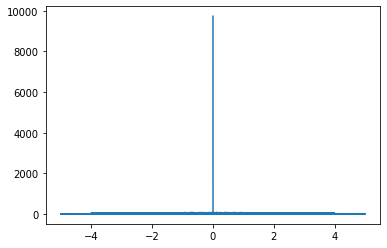

In [12]:
psd = np.abs(np.fft.fft(z_1))
freqs = np.fft.fftfreq(len(z_1),d=dt)
plt.plot(freqs,psd)
maximum = np.max(psd)

In [ ]:
frequencies = np.linspace(2,88,num=100)
sigma = 0.5
for i in frequencies:
    lowcut = i - sigma
    highcut = i + sigma
    help = np.fft.fft(sig_1_ana)
    W = np.fft.fftfreq(len(sig_1_ana),d=0.01)
    help[(np.abs(W)<highcut) &  (np.abs(W)>lowcut) ] = 0

    filtered_signal_1 = np.fft.ifft(help)


    test_z = filtered_signal_1 * np.conjugate(sig_2_ana) / (np.abs(filtered_signal_1) * np.abs(sig_2_ana))

    welsh_power = np.abs(np.fft.fft(test_z))
    welsh_frequencies = np.fft.fftfreq(len(test_z),d=0.01)
    #plt.plot(welsh_frequencies,welsh_power)
    #plt.show()
    maximum_new = np.max(welsh_power)
    point = np.argwhere(welsh_power==maximum_new)[0][0] 
    central_freq_new = welsh_frequencies[point]


frequency: 9.818181818181818


In [20]:
frequencies = np.linspace(2,88,num=100)
sigma = 0.5
for i in frequencies:
    lowcut = i - sigma
    highcut = i + sigma
    help = np.fft.fft(sig_2_ana)
    W = np.fft.fftfreq(len(sig_2_ana),d=0.01)
    help[(np.abs(W)<highcut) &  (np.abs(W)>lowcut) ] = 0

    filtered_signal_1 = np.fft.ifft(help)


    test_z = sig_1_ana * np.conjugate(filtered_signal_1) / (np.abs(filtered_signal_1) * np.abs(sig_1_ana))

    welsh_power = np.abs(np.fft.fft(test_z))
    welsh_frequencies = np.fft.fftfreq(len(test_z),d=0.01)
    #plt.plot(welsh_frequencies,welsh_power)
    #plt.show()
    maximum_new = np.max(welsh_power)
    point = np.argwhere(welsh_power==maximum_new)[0][0] 
    central_freq_new = welsh_frequencies[point]
    if maximum_new < maximum/10:
        print('frequency:', i)
        break 

frequency: 9.818181818181818
